In [1]:
from pycaret.datasets import get_data
boston_data = get_data('boston')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
from pycaret.regression import *
exp1 = setup(boston_data, target = 'medv')

 
Setup Succesfully Completed.


,Description,Value
0,session_id,6731
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(506, 14)"
4,Missing Values,False
5,Numeric Features,11
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [3]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Gradient Boosting Regressor,1.9962,7.1190,2.6147,0.9053,0.1279,0.1036,0.0701
1,CatBoost Regressor,1.9687,8.0396,2.7549,0.8955,0.1278,0.1002,0.9285
2,Extreme Gradient Boosting,2.0436,8.3187,2.8190,0.8906,0.1359,0.1048,0.0663
3,Random Forest,2.1084,8.9789,2.9201,0.8815,0.1331,0.1070,0.1095
4,Extra Trees Regressor,2.0460,8.8819,2.8745,0.8806,0.1297,0.1022,0.0852
5,Light Gradient Boosting Machine,2.2602,10.9150,3.1872,0.8504,0.1460,0.1163,0.0228
6,AdaBoost Regressor,2.5038,12.8506,3.4995,0.8276,0.1679,0.1362,0.0594
7,Decision Tree,2.7298,15.3692,3.8286,0.7824,0.1887,0.1461,0.0040
8,Linear Regression,3.3264,22.9940,4.7243,0.6895,0.2362,0.1707,0.0038
9,Ridge Regression,3.2938,23.1054,4.7232,0.6889,0.2421,0.1697,0.0029


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=6731, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [4]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.1831,7.6260,2.7615,0.8820,0.1195,0.1013
1,1.5797,5.4112,2.3262,0.9308,0.1079,0.0894
2,2.5117,11.8445,3.4416,0.8032,0.1329,0.1138
3,2.7696,18.9193,4.3496,0.8418,0.1570,0.1119
4,2.4469,10.5522,3.2484,0.8625,0.2079,0.1751
5,1.6923,4.7198,2.1725,0.9247,0.1094,0.0857
6,2.0055,5.8556,2.4198,0.9215,0.1271,0.1101
7,2.2447,11.5240,3.3947,0.8208,0.1550,0.1203
8,1.6023,4.3996,2.0975,0.9258,0.0941,0.0816
9,2.0483,8.9364,2.9894,0.9014,0.1206,0.0811


In [5]:
tuned_rf = tune_model('rf')

SystemExit: (Type Error): The behavior of tune_model in version 1.0.1 is changed. Please pass trained model object.

In [6]:
tuned_rf = rf
tuned_rf.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=6731, verbose=0, warm_start=False)>

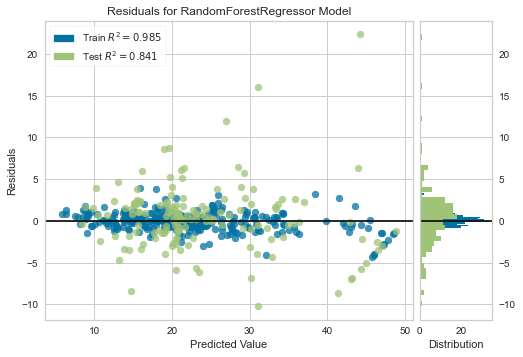

In [7]:
plot_model(tuned_rf)

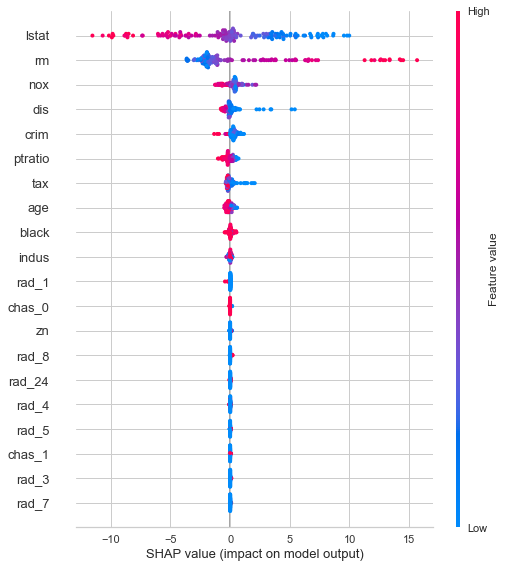

In [8]:
interpret_model(tuned_rf)

In [9]:
rf_holdout_pred = predict_model(rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,2.6931,15.972,3.9965,0.8415,0.1751,0.139


In [10]:
predictions = predict_model(rf, data=boston_data)